In [1]:
import numpy as np
import pandas as pd
import pymssql
import matplotlib.pyplot as plt
import matplotlib.dates as mdates    #處理日期

# 万得数据库连接，修改对应的连接
wind_conn = pymssql.connect(host='10.88.52.193',user='username', password='password', database='wind_db_fs',charset="utf8")

In [2]:
# 从万得数据库获取数据
margin_sql = "SELECT TRADE_DT,S_INFO_WINDCODE,S_MARGIN_PURCHWITHBORROWMONEY,S_MARGIN_TRADINGBALANCE,S_MARGIN_SALESOFBORROWEDSEC,"\
             "S_MARGIN_SECLENDINGBALANCEVOL,S_MARGIN_SECLENDINGBALANCE,S_MARGIN_MARGINTRADEBALANCE  FROM ASHAREMARGINTRADE WHERE TRADE_DT > 20190101"
margin_data = pd.read_sql(margin_sql,con=wind_conn)
# 重置数据索引，并排序
margin_data.set_index(['TRADE_DT','S_INFO_WINDCODE'],inplace=True)
margin_data.sort_index(inplace=True)
# 数据处理
margin_data['S_MARGIN_PURCHWITHBORROWMONEY'] = margin_data['S_MARGIN_PURCHWITHBORROWMONEY']/100000000
margin_data['S_MARGIN_TRADINGBALANCE'] = margin_data['S_MARGIN_TRADINGBALANCE']/100000000
margin_data['S_MARGIN_SALESOFBORROWEDSEC'] = margin_data['S_MARGIN_SALESOFBORROWEDSEC']/10000
margin_data['S_MARGIN_SECLENDINGBALANCEVOL'] = margin_data['S_MARGIN_SECLENDINGBALANCEVOL']/10000
margin_data['S_MARGIN_SECLENDINGBALANCE'] = margin_data['S_MARGIN_SECLENDINGBALANCE']/10000
margin_data['S_MARGIN_MARGINTRADEBALANCE'] = margin_data['S_MARGIN_MARGINTRADEBALANCE']/100000000
# 重置列名
margin_data.columns=['融资买入额(亿元)','融资余额(亿元)','融券卖出量(万股)','融券余量(万股)','融券余额(万元)','融资融券余额(亿元)']

In [3]:
# 统计数据
# 每个标的融资余额融券余额的最大值
stock_max = margin_data[['融资余额(亿元)','融券余额(万元)']].groupby(level=1).max()
# 每个标的融资余额融券余额的最小值
stock_min = margin_data[['融资余额(亿元)','融券余额(万元)']].groupby(level=1).min()
# 每个标的融资余额融券余额的均值
stock_mean = margin_data[['融资余额(亿元)','融券余额(万元)']].groupby(level=1).mean()
# 每个标的融资余额融券余额的标准差
stock_std = margin_data[['融资余额(亿元)','融券余额(万元)']].groupby(level=1).std()

In [51]:
# 最大值
stock_max.head()

,融资余额(亿元),融券余额(万元)
S_INFO_WINDCODE,,
000001.SZ,42.428346,10722.2376
000002.SZ,39.951620,9110.9425
000006.SZ,7.598674,598.7367
000008.SZ,5.744242,868.4548
000009.SZ,16.475551,6723.0209


In [52]:
# 最小值
stock_min.head()

,融资余额(亿元),融券余额(万元)
S_INFO_WINDCODE,,
000001.SZ,29.368399,557.3386
000002.SZ,14.506292,2179.5288
000006.SZ,4.998915,23.3500
000008.SZ,1.024555,0.0000
000009.SZ,10.695463,21.3709


In [53]:
# 均值
stock_mean.head()

,融资余额(亿元),融券余额(万元)
S_INFO_WINDCODE,,
000001.SZ,34.348230,3601.682447
000002.SZ,27.237833,4436.577988
000006.SZ,6.208969,143.955907
000008.SZ,3.597870,63.060894
000009.SZ,12.556363,803.243013


In [54]:
# 标准差
stock_std.head()

,融资余额(亿元),融券余额(万元)
S_INFO_WINDCODE,,
000001.SZ,2.641221,2341.063990
000002.SZ,5.738538,1267.052731
000006.SZ,0.653761,105.494734
000008.SZ,0.908185,134.954229
000009.SZ,1.206532,1323.661662


In [49]:
def generate_figure(stock_code):
    """生成个股融资融券余额的走势图，入参stock_code(str)"""
    temp_data = margin_data.loc[pd.IndexSlice[:,stock_code],['融资余额(亿元)','融券余额(万元)']]
    temp_data.index = temp_data.index.droplevel(1)
    # ---------- 解决中文乱码问题 ---------- #
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    x = np.arange(0,len(temp_data))
    y1 = temp_data['融资余额(亿元)']
    y2 = temp_data['融券余额(万元)']

    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y1)
    ax1.set_ylabel('融资余额(亿元)-蓝色')
    ax1.set_title(stock_code + "融资融券余额走势")
    # ax1.set_xlabel(x_tick)

    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(x, y2, 'r')
    ax2.set_xlim([0,len(temp_data)])
    ax2.set_ylabel('融券余额(万元)-红色')
    # ax1.set_xlabel(x_tick)

    plt.show()

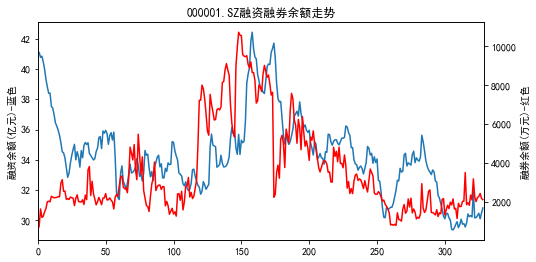

In [55]:
# 生成融资融券余额走势图
generate_figure('000001.SZ')